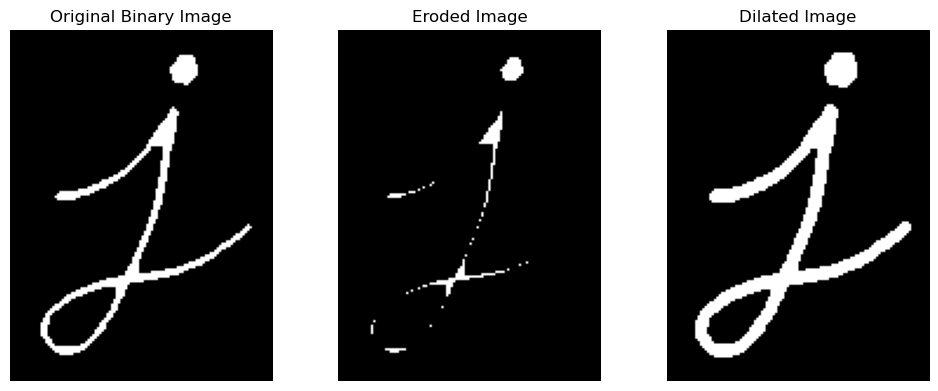

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
image = Image.open(r"C:/Users/gaura/Downloads/jimg.png").convert('L')

# Convert to binary image using thresholding
image = image.point(lambda p: p > 128 and 255)
image_array = np.array(image)

# Define a 3x3 kernel
kernel = np.ones((3, 3), dtype=int)

def erosion(img, kernel):
    m, n = kernel.shape
    pad = m // 2
    img_padded = np.pad(img, pad, mode='constant', constant_values=255)
    eroded_img = np.copy(img)

    for i in range(pad, img.shape[0] + pad):
        for j in range(pad, img.shape[1] + pad):
            region = img_padded[i - pad:i + pad + 1, j - pad:j + pad + 1]
            if np.all(region == 255):
                eroded_img[i - pad, j - pad] = 255
            else:
                eroded_img[i - pad, j - pad] = 0
    return eroded_img

def dilation(img, kernel):
    m, n = kernel.shape
    pad = m // 2
    img_padded = np.pad(img, pad, mode='constant', constant_values=0)
    dilated_img = np.copy(img)

    for i in range(pad, img.shape[0] + pad):
        for j in range(pad, img.shape[1] + pad):
            region = img_padded[i - pad:i + pad + 1, j - pad:j + pad + 1]
            if np.any(region == 255):
                dilated_img[i - pad, j - pad] = 255
            else:
                dilated_img[i - pad, j - pad] = 0
    return dilated_img

# Apply erosion and dilation
eroded = erosion(image_array, kernel)
dilated = dilation(image_array, kernel)

# Display images
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.tight_layout()
plt.show()


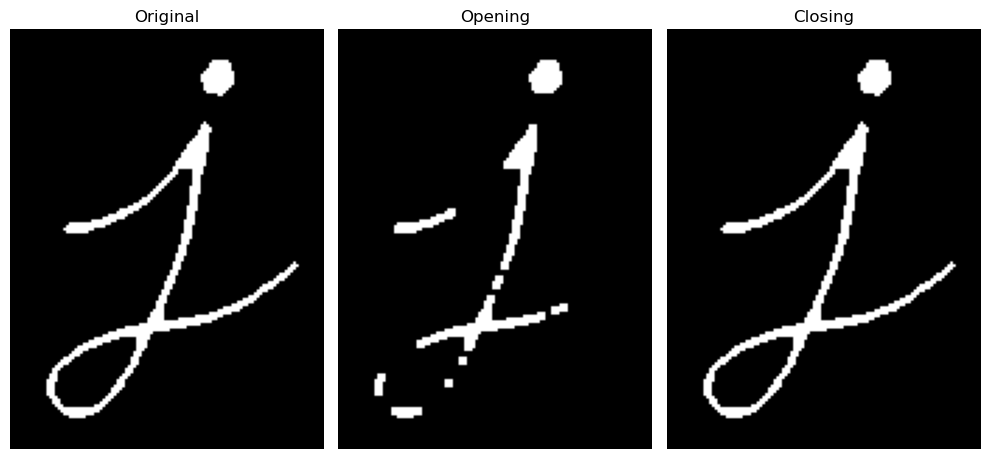

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load Image & Convert to Grayscale
image = Image.open(r"C:/Users/gaura/Downloads/jimg.png").convert('L')

# Convert to Binary Image (Black & White)
image = image.point(lambda p: p > 128 and 255)
image_array = np.array(image)

# 3x3 Kernel
kernel = np.ones((3, 3), dtype=int)

# Erosion Function
def erosion(img, kernel):
    m, n = kernel.shape
    pad = m // 2
    img_padded = np.pad(img, pad, mode='constant', constant_values=255)
    eroded_img = np.copy(img)

    for i in range(pad, img.shape[0] + pad):
        for j in range(pad, img.shape[1] + pad):
            region = img_padded[i - pad:i + pad + 1, j - pad:j + pad + 1]
            if np.all(region == 255):
                eroded_img[i - pad, j - pad] = 255
            else:
                eroded_img[i - pad, j - pad] = 0

    return eroded_img

# Dilation Function
def dilation(img, kernel):
    m, n = kernel.shape
    pad = m // 2
    img_padded = np.pad(img, pad, mode='constant', constant_values=0)
    dilated_img = np.copy(img)

    for i in range(pad, img.shape[0] + pad):
        for j in range(pad, img.shape[1] + pad):
            region = img_padded[i - pad:i + pad + 1, j - pad:j + pad + 1]
            if np.any(region == 255):
                dilated_img[i - pad, j - pad] = 255
            else:
                dilated_img[i - pad, j - pad] = 0

    return dilated_img

# Morphological Operations
eroded = erosion(image_array, kernel)
dilated = dilation(image_array, kernel)

# Opening = Erosion → Dilation
opening = dilation(eroded, kernel)

# Closing = Dilation → Erosion
closing = erosion(dilated, kernel)

# Display Results
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(opening, cmap='gray')
plt.title('Opening')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(closing, cmap='gray')
plt.title('Closing')
plt.axis('off')

plt.tight_layout()
plt.show()
